<a href="https://colab.research.google.com/github/GuillermoSainz07/Notebooks-DS/blob/main/Asesores_automaticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investor Risk Tolerance and Robo-Advisor

La meta de esta caso de estudio es responder las siguientes preguntas:
- Machine learning, puede darnos un mejor entendimiento de el perfil de riesgo de un inversionitas que los cuestionarios de toleracia al riesgo?
- Puede Machine learning contribuir a la automatizacion del proceso entedo de gestion de portafolios quitando a los inversioniitas del proceso?
- Un algoritmo prodria ser escrito para desarrollar un perfil para el cliente que seria una mejor representacion de como ellos tratatian con diferentes escenarios de mercado?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_excel('SCFP2009panel.xlsx')

In [ ]:
dataset.shape

(19285, 521)

In [ ]:
dataset.head()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,NHMORTPCT,WAGEINCPCT,BUSSEFARMINCPCT,INTDIVINCPCT,KGINCPCT,SSRETINCPCT,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I
0,1,11,11668.134198,47,3,12,2,1,0,2,...,-21.052632,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,270.403054,57
1,1,12,11823.456494,47,3,12,2,1,0,2,...,-21.052632,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,249.593620,57
2,1,13,11913.228354,47,3,12,2,1,0,2,...,-50.000000,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,209.233358,57
3,1,14,11929.394266,47,3,12,2,1,0,2,...,-33.333333,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,209.273158,57
4,1,15,11917.722907,47,3,12,2,1,0,2,...,-38.596491,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,232.690767,57


In [ ]:
plt.figure(figsize=(30,40))
sns.histplot(dataset.isna().melt(),y='variable',hue='value') ## No hay datos faltantes
plt.show()

In [ ]:
dataset.isnull().values.any()

False

Primero tenemos que preparar la variable que tratamos de predecir, que es la tolerancia al riesgo.

Esta variable la definimo la variable de tolerancia al riesgo como el ratio de los activos riesgosos para el total de activos, donde el total de activos riesgosos seran la suma de los activos riesgosos y los activos libres de riesgo.Tambien normalizaremos los activos de riesgo con el precio de un indice bursatil

Tambien identificamos a los inversores inteligentes. Esto se podrias definicir como los inversionitas que no cambian su tolerancia al riesgo aun que haya cambios en los mercados. Por lo tanto identificamos a los invesionitas inteligentes como aqueyos que despues de 2007 (post-crisis) su tolerancia al riesgo no haya cambiando en mas del 10%

In [ ]:
avg_sp500_07 = 1478
avg_sp500_09 = 948

# Tolerancia al riesgo 2007
dataset['RiskFree07'] = dataset['LIQ07'] + dataset['CDS07'] + dataset['SAVBND07'] + \
                        dataset['CASHLI07']
dataset['Risk07'] = dataset['NMMF07'] + dataset['STOCKS07'] + dataset['BOND07']
dataset['rt07'] = dataset['Risk07']/(dataset['Risk07'] + dataset['RiskFree07'] )

# Tolerancia al riesgo 2009
dataset['RiskFree09'] = dataset['LIQ09'] + dataset['CDS09'] + dataset['SAVBND09'] + \
                        dataset['CASHLI09']
dataset['Risk09'] = dataset['NMMF09'] + dataset['STOCKS09'] + dataset['BOND09']
dataset['rt09'] = dataset['Risk09']/(dataset['Risk09'] + dataset['RiskFree09'])*\
                  (avg_sp500_09/avg_sp500_07)

In [ ]:
dataset2 = dataset.copy()
dataset2.head()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I,RiskFree07,Risk07,rt07,RiskFree09,Risk09,rt09
0,1,11,11668.134198,47,3,12,2,1,0,2,...,0.0,93.125197,270.403054,57,7994.813847,0.0,0.0,16000,17000,0.330422
1,1,12,11823.456494,47,3,12,2,1,0,2,...,0.0,93.125197,249.593620,57,7994.813847,0.0,0.0,19000,18000,0.312036
2,1,13,11913.228354,47,3,12,2,1,0,2,...,0.0,93.125197,209.233358,57,7984.457871,0.0,0.0,13000,12000,0.307876
3,1,14,11929.394266,47,3,12,2,1,0,2,...,0.0,93.125197,209.273158,57,7984.457871,0.0,0.0,25000,13000,0.219429
4,1,15,11917.722907,47,3,12,2,1,0,2,...,0.0,93.125197,232.690767,57,7994.813847,0.0,0.0,17000,12000,0.265410


In [ ]:
# Cambio en el riesgo de la tolerancia
dataset2['CambioTol'] = np.abs(dataset2['rt09'] / dataset2['rt07'] - 1)

In [ ]:
dataset2.isnull().values.any()

True

In [ ]:
dataset2.dropna(axis=0, inplace=True)
dataset2.shape

(9230, 522)

In [ ]:
dataset2 = dataset2[~dataset2.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

In [ ]:
dataset2.isnull().values.any()

False

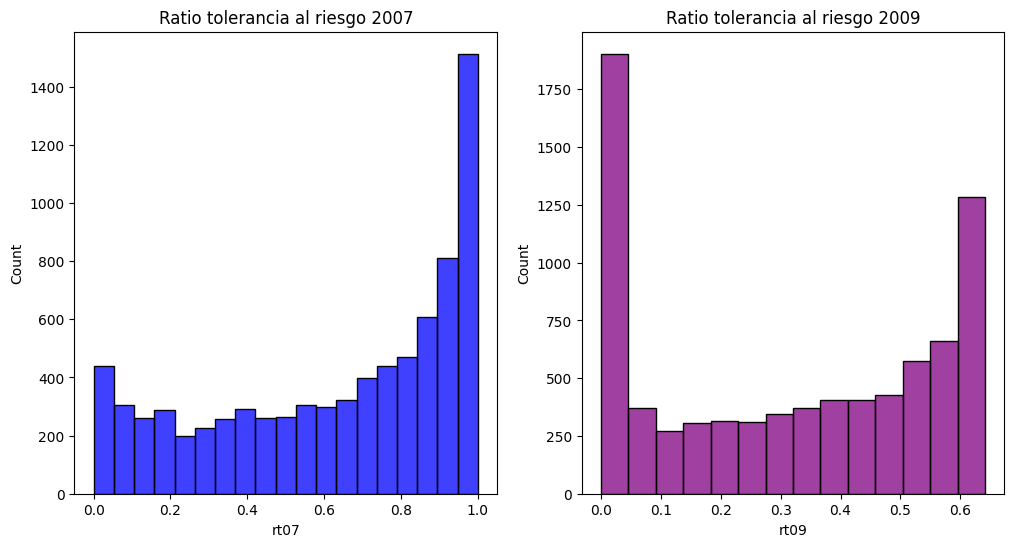

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.histplot(dataset2.rt07,
             color='blue', ax=ax[0])
ax[0].set_title('Ratio tolerancia al riesgo 2007')

sns.histplot(dataset2.rt09,
             color='purple', ax=ax[1])
ax[1].set_title('Ratio tolerancia al riesgo 2009')
plt.show()

Podemos observare que la tolerancia al riesgo de los inversores en 2007 estaba estaba muy cercana a 1, lo que siginifica que las inversiones estaban sesgadas hacia activos de riesgo. Mientras que en 2009 la mayor cantidad de tolerancia al reisgo se concentra en 0. Es decir despues de la crisis prefirieron activos sin riesgo. La tolerancia al riesgo general disminuyo

In [ ]:
dataset3 = dataset2.copy()

Seleccionar los inversores inteligentes

In [ ]:
dataset3 = dataset3.assign(investor = lambda x: x['CambioTol'] <= 0.1)
dataset3['investor'] = dataset3.investor.replace([True, False], [1,0])

In [ ]:
dataset3.head()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,LEVERAGEPCT,I,RiskFree07,Risk07,rt07,RiskFree09,Risk09,rt09,CambioTol,investor
5,2,21,255.421402,56,4,17,4,1,2,5,...,131.926121,57,337604.83344,1.387701e+06,0.804322,230000,350000,0.387056,0.518779,0
6,2,22,265.151248,56,4,17,4,1,2,5,...,131.926121,57,337604.83344,1.480905e+06,0.814351,230000,350000,0.387056,0.524706,0
7,2,23,254.044527,56,4,17,4,1,2,5,...,131.926121,57,337604.83344,1.164012e+06,0.775172,230000,350000,0.387056,0.500684,0
8,2,24,252.877840,56,4,17,4,1,2,5,...,131.926121,57,337604.83344,2.489577e+06,0.880586,230000,350000,0.387056,0.560456,0
9,2,25,245.023339,56,4,17,4,1,2,5,...,131.926121,57,337604.83344,1.862005e+06,0.846516,230000,350000,0.387056,0.542766,0


In [ ]:
dataset4 = dataset3.copy()
dataset4 = dataset4[dataset4['CambioTol'] <= 0.1]

Asignamos la tolerancia al riesgo real como el promedio de la tolerancia al riesgo de los inversores inteligentes entre 2007 y 2009

In [ ]:
dataset4['RealRisk'] = (dataset4.rt09 + dataset4.rt07) / 2

In [ ]:
dataset4.head()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,I,RiskFree07,Risk07,rt07,RiskFree09,Risk09,rt09,CambioTol,investor,RealRisk
60,14,141,13732.681713,77,6,12,2,1,0,6,...,57,1.170225e+04,2.899673e+03,0.198582,11000,5000,0.200440,0.009357,1,0.199511
425,95,951,43.840398,55,4,17,4,1,1,5,...,57,1.102911e+06,2.226535e+06,0.668740,1354500,30550000,0.614176,0.081592,1,0.641458
1122,253,2533,297.850586,85,6,17,4,1,0,5,...,57,2.148865e+06,3.075725e+06,0.588702,70000,824000,0.591185,0.004219,1,0.589943
1190,270,2701,7184.506057,40,2,12,2,1,3,3,...,57,2.122975e+03,1.656956e+03,0.438356,12300,25000,0.429898,0.019296,1,0.434127
1228,279,2794,4340.608277,70,5,12,2,1,0,5,...,57,1.788477e+05,5.488668e+04,0.234825,331500,175000,0.221612,0.056269,1,0.228218


In [ ]:
dataset4.drop(labels=['rt07','rt09'], axis=1, inplace=True)
dataset4.drop(['investor','CambioTol'], axis=1, inplace=True)

## Feature selection

Vamos a mantener solo las caracteristicas que sean relevantes e intuitivas segun la reserva federal. En el dataset tenemos mas de 500 caracteristicas, sin embargo la literatura y la industria nos indica que la tolerancia al riesgo esta fuertemente influenciada por:
- La demografia del inversor
- Atributos financieros y de comportamiento

Por ejemplo: Edad, ingreso actual,valor neto, voluntad de tomar riesgo, etc

In [ ]:
list_feature = ['AGE07','EDCL07','MARRIED07','KIDS07','OCCAT107',
                'INCOME07','Risk07','NETWORTH07','RealRisk']
not_features = [f for f in dataset4.columns if f not in list_feature]

In [ ]:
dataset4.drop(not_features, axis=1, inplace=True)

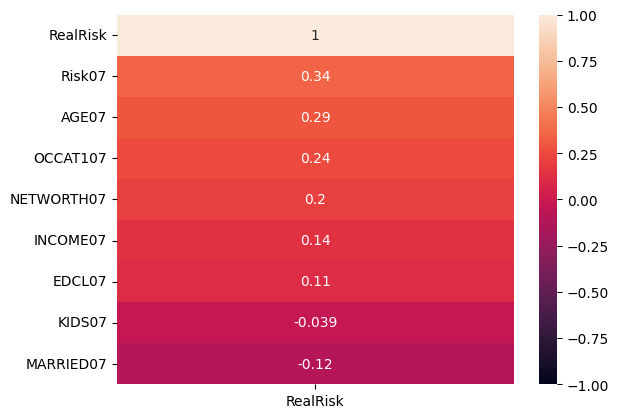

In [ ]:
sns.heatmap(pd.DataFrame(dataset4.corr().sort_values(by='RealRisk',ascending=False)['RealRisk']),
            vmin=-1, vmax=1, annot=True)
plt.show()

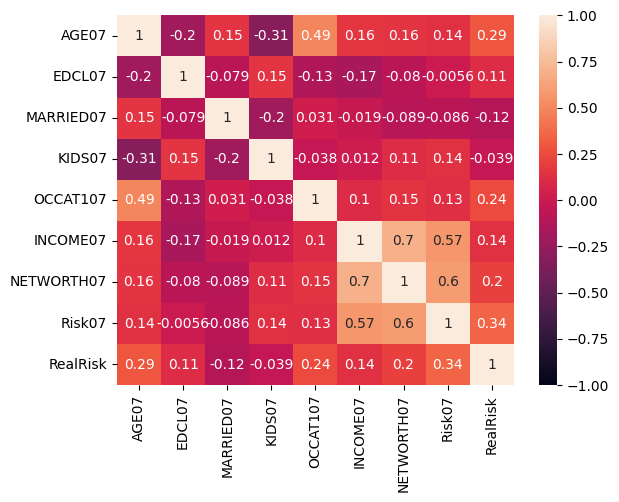

In [ ]:
sns.heatmap(dataset4.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

## Evaluacion de algoritmos y modelos

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

In [ ]:
y = dataset4['RealRisk']
x = dataset4[list_feature].drop('RealRisk', axis=1)
test_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)


In [ ]:
modelos = {'lr': LinearRegression(),
          'ls': Lasso(),
          'knn': KNeighborsRegressor(),
          'cart': DecisionTreeRegressor(),
          'svr': SVR(),
          'gbr': GradientBoostingRegressor(),
          'rf': RandomForestRegressor()}

resultados = {}

In [ ]:
for name, model in modelos.items():
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model, x_train,y_train, cv=10, scoring='r2')
  resultados[name] = cv_results

<ipython-input-194-c38cc1a8702b>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


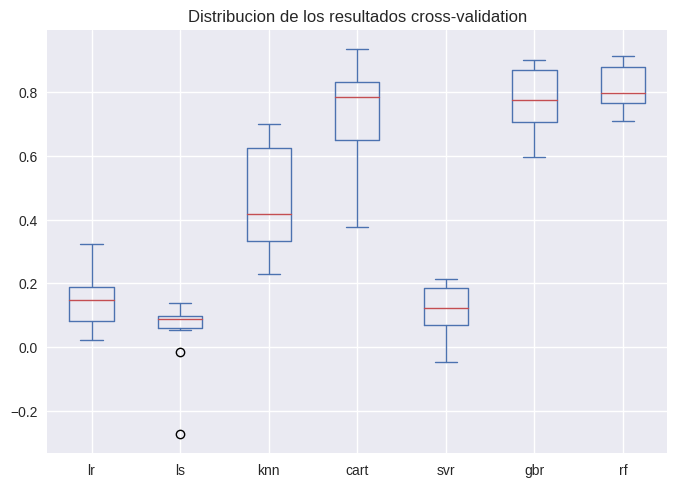

In [ ]:
plt.style.use('seaborn')
resultados_df = pd.DataFrame(resultados)
resultados_df.plot(kind='box', title='Distribucion de los resultados cross-validation')
plt.show()

Como lo podemo ver los modelos no lineales funcionan mejor que los modelos lineales, lo que significa que hay una relacion no lineal entre la tolerancia al riesgo y las variables utilizadas para predecirlo. Dado que la RandomForestRegressor es uno de lo mejores metodos, lo utilizaremos para el GridSearch. Tambien probaremos el algoritmo de xgboost y haremos la comparativa

## Modelo final

In [ ]:
modelo = RandomForestRegressor()
param_grid = {'n_estimators':[50,100,150,200,250,300,350,400,500],
              'max_depth':[2,4,6,8],
              'max_features':[1,'sqrt','log2']}
op_model = GridSearchCV(modelo, param_grid, cv=3)
op_model.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': [1, 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          500]})

In [ ]:
print(f'Mejores parametros: {op_model.best_params_}')
print(f'Mejor score: {op_model.best_score_}')

Mejores parametros: {'max_depth': 8, 'max_features': 'log2', 'n_estimators': 100}
Mejor score: 0.7620359647240122


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
modelo_rf = RandomForestRegressor(n_estimators=100,
                                  max_depth=8,
                                  max_features='log2')
modelo_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, max_features='log2')

In [ ]:
predicciones_train = modelo_rf.predict(x_train)
print(r2_score(y_train, predicciones_train))

0.9508845789341215


In [ ]:
predicciones = modelo_rf.predict(x_test)
print(mean_squared_error(y_test, predicciones))
print(r2_score(y_test, predicciones))

0.0059243978895444456
0.8183889432285673


## Feature importance e intuicion

In [ ]:
fi = pd.DataFrame(modelo_rf.feature_importances_, columns=['Importance'], index=x_train.columns)
fi = fi.sort_values(by='Importance', ascending=True)

In [ ]:
fi

,Importance
MARRIED07,0.014046
EDCL07,0.020267
OCCAT107,0.021446
KIDS07,0.040685
AGE07,0.128828
INCOME07,0.144589
NETWORTH07,0.169537
Risk07,0.460603


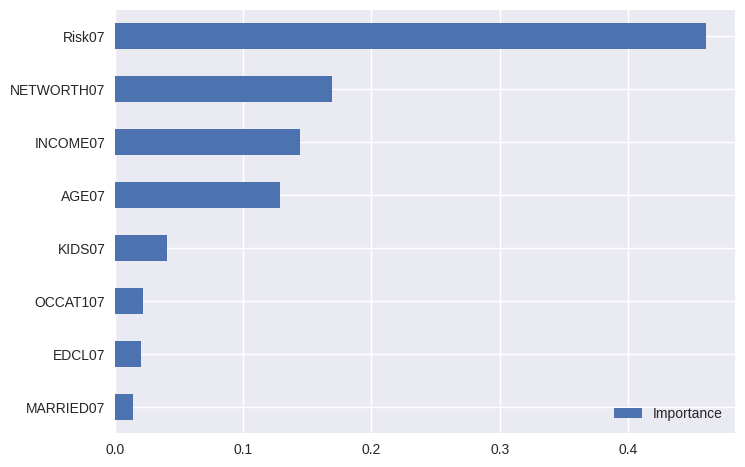

In [ ]:
fi.plot(kind='barh')
plt.show()

## Xgboost model

In [ ]:
model_xgb = xgb.XGBRegressor(n_estimators=1000,
                             early_stopping_rounds=50)

model_xgb.fit(x_train,y_train,
              eval_set=[(x_train,y_train),(x_test,y_test)],
              verbose=100)

[0]	validation_0-rmse:0.15458	validation_1-rmse:0.17318
[100]	validation_0-rmse:0.00146	validation_1-rmse:0.06180
[200]	validation_0-rmse:0.00146	validation_1-rmse:0.06180
[300]	validation_0-rmse:0.00146	validation_1-rmse:0.06180
[333]	validation_0-rmse:0.00146	validation_1-rmse:0.06180


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Train results
predicciones_train_xgb = model_xgb.predict(x_train)
print(f'{mean_squared_error(y_train,predicciones_train_xgb):.2f}')
print(r2_score(y_train, predicciones_train_xgb))

0.00
0.9999352247525072


In [ ]:
# Test results
predicciones_xgb = model_xgb.predict(x_test)
print(mean_squared_error(y_test, predicciones_xgb))
print(r2_score(y_test, predicciones_xgb))

0.0038194454469953104
0.8829157769545094


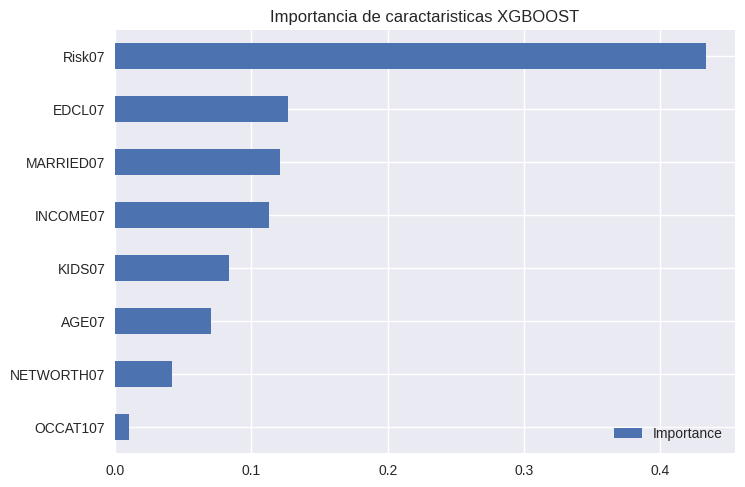

In [ ]:
fi_xgb = pd.DataFrame(model_xgb.feature_importances_, columns=['Importance'], index=x_train.columns)
fi_xgb.sort_values(by='Importance', ascending=True, inplace=True)
fi_xgb.plot(kind='barh', title='Importancia de caractaristicas XGBOOST')
plt.show()